In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

<h2>Read Dataset</h2>

In [2]:
data = pd.read_csv('Iris.csv')
print(data.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
print(data.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


<h2>label encode the target variable</h2>

In [4]:
encode = LabelEncoder()
data['Species'] = encode.fit_transform(data['Species'])

In [5]:
print(data.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0


In [6]:
x = data.iloc[:, :4].values
Y = data.iloc[:, -1:].values

<h2>train-test-split</h2>

In [7]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2,random_state=0)

<h2>Decision Tree Regression</h2>

In [8]:
from sklearn.tree import DecisionTreeRegressor , export_graphviz
model = DecisionTreeRegressor(random_state = 0)
model.fit(x_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [9]:
predict = model.predict(x_test)

<h2>Print Accuracy_scroe</h2>

In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predict)*100,'%')

100.0 %


<h2>Print Decision Tree Regressor</h2>

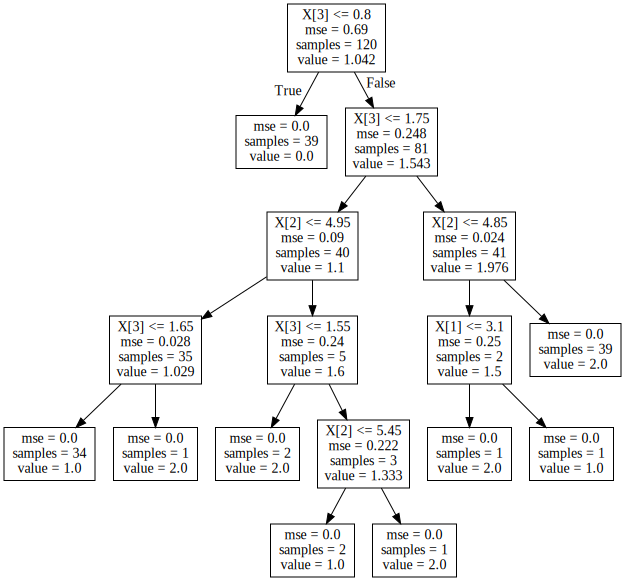

In [12]:
import graphviz

export_graphviz(model,out_file="model.dot")
                
with open("model.dot") as models:
    model_graph = models.read()
graphviz.Source(model_graph)